# APMTH 207: Advanced Scientific Computing: 
## Stochastic Methods for Data Analysis, Inference and Optimization
## Homework #2
**Harvard University**<br>
**Spring 2017**<br>
**Instructors: Rahul Dave**<br>
**Due Date: ** Thursday, Febrary 9th, 2017 at 11:59pm

**Instructions:**

- Upload your final answers as well as your iPython notebook containing all work to Canvas.

- Structure your notebook and your work to maximize readability.

In [2]:
import numpy as np
from scipy.stats import norm
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
%matplotlib inline
from functools import partial

## Problem 1: Monte Carlo Integration

Let $X$ be a random variable with distribution described by the following pdf:

$$
f_X(x) = \begin{cases}
\frac{1}{12}(x-1), &1\leq x\leq 3\\
-\frac{1}{12}(x-5), &3< x\leq 5\\
\frac{1}{6}(x-5), &5< x\leq 7\\
-\frac{1}{6}(x-9), &7< x\leq 9\\
0, &otherwise
\end{cases}
$$

Let $h$ be the following function of $X$:

$$
h(X) = \frac{1}{3\sqrt{2}\pi}\mathrm{exp}\left\{ -\frac{1}{18}\left( X - 5\right)^2\right\}
$$

Compute $\mathbb{E}[h(X)]$ via Monte Carlo simulation using the following sampling methods:
- inverse transform sampling
- rejection sampling with both uniform proposal distribution and normal proposal distribution (steroids) (with appropriately chosen parameters)
- importance sampling with both uniform proposal distribution and normal proposal distribution (with appropriately chosen parameters)

### REVIEW OF SIMULATION AND SAMPLING
**(Feel free to skip if you're solid on the theoretical underpinning of these methods)**

### 0. Review of Monte Carlo Simulation
Let's define $Y = h(X)$. Since $X$ is a random variable, so too is $Y$. Thus, it make sense to compute its mean, that is, to compute 
$$\mathbb{E}[Y] = \mathbb{E}[h(X)].$$ 
Recall, from Week 1 (review of statistics) and Homework 1, that a good (meaning consistent and unbiased) estimator of the mean (or expected value) of a random variable is the *sample mean*. That is, we can approximate the mean of $Y$ by sampling $n$ number of values of $Y$ and then computing the average of these values:
$$
\mathbb{E}[Y] \approx \frac{1}{n} \sum_{i=1}^n Y^{(i)},
$$
where each $Y^{(i)}$ is drawn independently from the distribution of $Y$. 

But how do we generate $n$ number of values of $Y$? Since $Y$ is a (deterministic) function of $X$, we can generate $n$ number of values of $Y$ by:

1. independently drawing $n$ number of values of $X$, where $X^{(i)} \sim f_X$, for $1 \leq i \leq n$. 
2. plug in the $n$ values of $X$ into $h$, obtaining $Y^{(i)} = h(X^{i})$, for $1 \leq i \leq n$.

Thus, we can estimate the mean of $Y$ as follows:
$$
\mathbb{E}[Y] = \mathbb{E}[h(X)] \approx \frac{1}{n} \sum_{i=1}^n h(X^{(i)}), \quad X^{(i)}\sim f_X
$$

Let's define $\bar{Y}_n$ to be our estimate $\frac{1}{n} \sum_{i=1}^n h(X^{(i)})$. To re-iterate, $\bar{Y}_n$ is an good estimator of $\mathbb{E}[Y]$ because:

- **$\bar{Y}_n$ is unbiased**: $\mathbb{E}[\bar{Y}_n] = \mathbb{E}[Y]$
- **$\bar{Y}_n$ is consistent**: $\lim_{n\to \infty}\bar{Y}_n = \mathbb{E}[Y]$ 


>**An IF-YOU-CARE, SUPER TECHNICAL Note:** more precisely, the second statement should be "the probability of $\lim_{n\to \infty}\bar{Y}_n = \mathbb{E}[Y]$ is 1" or "$\lim_{n\to \infty}\bar{Y}_n = \mathbb{E}[Y]$ almost surely". Furthermore, the statement that "$\lim_{n\to \infty}\bar{Y}_n = \mathbb{E}[Y]$ almost surely" is actually stronger than requiring $\bar{Y}_n$ to be a  consistent estimator, the latter only requiring the probability of $|\lim_{n\to \infty}\bar{Y}_n -  \mathbb{E}[Y]| \geq \epsilon$ to be zero for every $\epsilon >0$. 

**CONCLUSION:** 
So, it appears that estimating $\mathbb{E}[Y] = \mathbb{E}[h(X)]$ is easy as long as we can sample from $f_X$. The problem is that, in practice, we often work with pdf's that are easy to evalutate but difficult to sample from. In our case, we can easily compute $f_X(x)$ when we are given a number $x \in \mathbb{R}$, but it's not clear how to generate values of $x$ from the distribution described by $f_X$. 

In the following sections, we address the difficulty of sampling from $f_X$. 

### I. Inverse Transform Sampling

The idea behind Inverse Transform Sampling is that while it is sometimes difficult to generate values for $X$ with the relative frequency described by pdf, $f_X$, it can be easier to generate values for $X$ using the CDF. 

The intuition is as follows:

1. While the support of the pdf and CDF can be unbounded, the range of the CDF is bounded between 0 and 1.
2. The CDF for a continuous single-variable pdf is an invertible function (on the support of the pdf). That is, each value between 0 and 1 corresponds to a unique value of the random variable $X$.
3. Values of $X$ that lie under peaks of the pdf occupy larger portions of the interval [0, 1]. That is, the range of the CDF, [0, 1], can be subdivided to exactly reflect the areas of high probability mass and low probability mass under the pdf. 

So if we uniformly sample values in the range of the CDF, [0, 1] and find the corresponding $X$ values for these samples (using the inverse function of the CDF), we obtain samples of $X$. 

### II. Rejection Sampling


### III. Importance Sampling


---

**Solutions:**

The piecewise definition of the pdf looks intimidating at first glance, so let's visualize it.

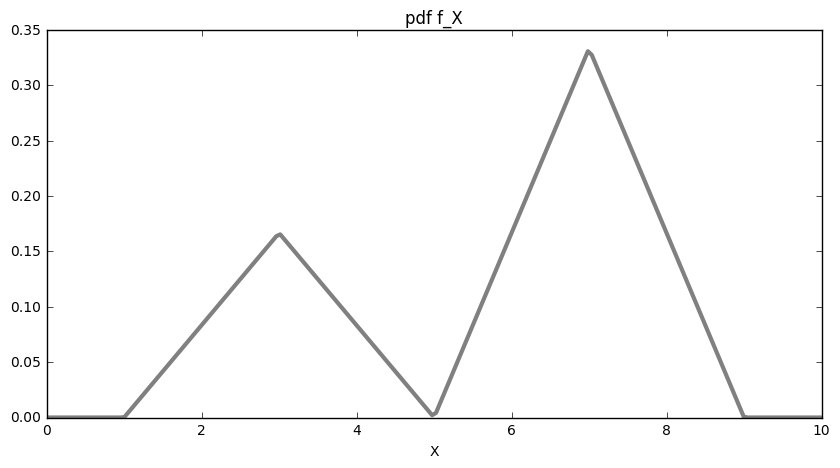

In [3]:
#pdf
def f_X(x):
    if x >= 1 and x <= 3:
        return 1./12 * (x - 1.)
    elif x > 3 and x <= 5:
        return -1./12 * (x - 5)
    elif x > 5 and x <= 7:
        return 1./6 * (x - 5)
    elif x > 7 and x <= 9:
        return -1./6 * (x - 9)
    else:
        return 0.

#visualize pdf
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
x = np.linspace(0, 10, 200)
ax.plot(x, map(f_X, x), color='gray', linewidth=3)
ax.set_xlabel('X')
ax.set_title('pdf f_X')
plt.show()

#### Inverse Transform Sampling

Recall that the CDF, $F_X$, of our pdf $f_X$ is defined as:
$$
F_X(a)= \int_{-\infty}^a f_X(x)dx, \quad a\in \mathbb{R}
$$
That is, $F_X(a)$ is the area under $f_X$ up to $X=a$. Now, since our pdf is zero when $X < 1$. We rewrite the above as
$$
F_X(a)= \int_{1}^a f_X(x)dx, \quad a\in \mathbb{R}
$$

Since our function is defined piecewise, we can compute the CDF on each piece. We demonstrate this process for the third piece, $5< x\leq 7$:

- the pdf over $[5, 7]$ has the form $\frac{1}{6}(x-5)$; 
- an antiderivative is $\frac{1}{6}\left(\frac{1}{2}x^2-5x\right)$; 
- the CDF over $[5, 7]$ is the area under $f_X$ from $X=1$ to $X=a$, $a\in [5, 7]$;

**Be careful:** you cannot compute the CDF as follows (simply by using the Fundamental Theorem)
$$
F_X(a)= \int_{1}^a f_X(x)dx = \left.\frac{1}{6}\left(\frac{1}{2}x^2-5x\right) \right|_{1}^{a}, \quad a\in [5, 7]
$$
This is because the functional form of the antiderivative is different out side of the interval [5, 7]!

Instead, we break up the pdf as follows:
\begin{aligned}
F_X(a) &= \int_{5}^a f_X(x)dx  + \int_{1}^5 f_X(x)dx \\
&= \left.\frac{1}{6}\left(\frac{1}{2}x^2-5x\right) \right|_{5}^{a} + \frac{1}{3} \\
&= \frac{1}{6}(a^2/2-5a) + \frac{25}{12} + \frac{1}{3}, \quad a\in [5, 7],
\end{aligned}
In the above, we note that the area $\int_{1}^5 f_X(x)dx$ is the area of the small triangle, which is 1/3. 

The shaded region below illustrates the value of $F_X(a)$ for $a\in [5, 7]$.

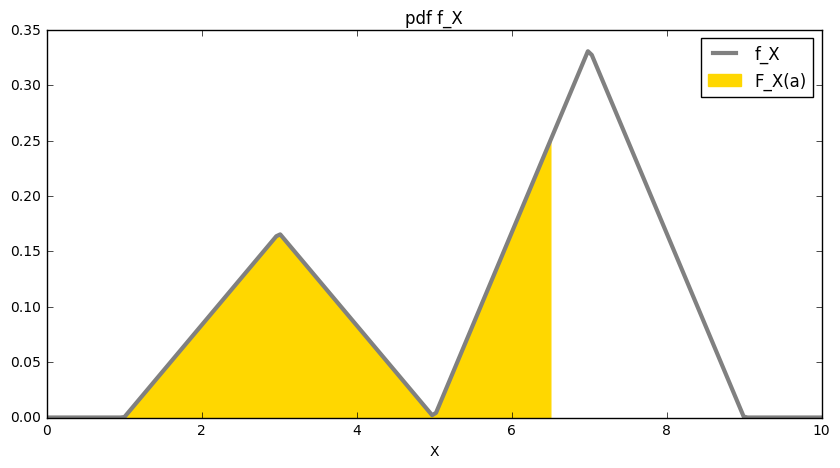

In [4]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
x = np.linspace(0, 10, 200)
ax.plot(x, map(f_X, x), color='gray', linewidth=3, label='f_X')
x = np.linspace(1, 6.5, 200)
ax.fill_between(x, map(f_X, x), color='gold', label='F_X(a)')
ax.set_xlabel('X')
ax.set_title('pdf f_X')
ax.legend(loc='best')
plt.show()

In a similar manner, we compute expressions for the CDF of $X$ on all four pieces of the domain:
$$
F_X(x) = \begin{cases}
0, & x < 1 \\
\frac{1}{12}(x^2/2-x) + \frac{1}{24}, &1\leq x\leq 3\\
-\frac{1}{12}(x^2/2-5x) - \frac{7}{8} + \frac{1}{6}, &3< x\leq 5\\
\frac{1}{6}(x^2/2-5x) + \frac{25}{12} + \frac{1}{3}, &5< x\leq 7\\
-\frac{1}{6}(x^2/2 - 9x) - \frac{77}{12} + \frac{2}{3}, &7< x\leq 9\\
1, &9 < x
\end{cases}
$$
Each piece of $F_X$ can now be inverted, with the help of [WolframAlpha](https://www.wolframalpha.com) if you'd like:
$$
F^{-1}_X(y) = \begin{cases}
1 + 2\sqrt{6y}, &0\leq y\leq \frac{1}{6}\\
5 - 2\sqrt{2(1 - 3y)}, &\frac{1}{6}< y\leq \frac{1}{3}\\
5 + 2\sqrt{3y - 1}, &\frac{1}{3}< y\leq \frac{2}{3}\\
9 - 2\sqrt{3(1 - y)}, &\frac{2}{3}< y\leq 1\\
\end{cases}
$$

We now have all the pieces we need to sample from $f_X$.

In [5]:
#inverse of CDF
def F_inv_X(y):
    if y >= 0 and y <= 1./6:
        return 1 + 2 * np.sqrt(6 * y)
    elif y > 1./6 and y <= 1./3:
        return 5 - 2 * np.sqrt(2 * (1 - 3 * y))
    elif y > 1./3 and y <= 2./3:
        return 5 + 2 * np.sqrt(3 * y - 1)
    elif y > 2./3 and y <= 1.:
        return 9 - 2 * np.sqrt(3 * (1 - y))
    else:
        return np.nan

#function h
def h(x):
    return 1./(3 * 2**.5 * np.pi) * np.exp(-1./18 * (x - 5)**2)

#inverse transform sampling
def inverse_transform(h, F_inv_X, n):

    #1. sample y-values uniformly from [0, 1]
    y = np.random.uniform(0, 1, n)

    #2. turn these y-values into x-values using the inverse CDF
    x_samples = map(F_inv_X, y)

    #3. apply h to the x-values and average
    mean_inv = np.mean(map(h, x_samples))
    
    return x_samples, mean_inv

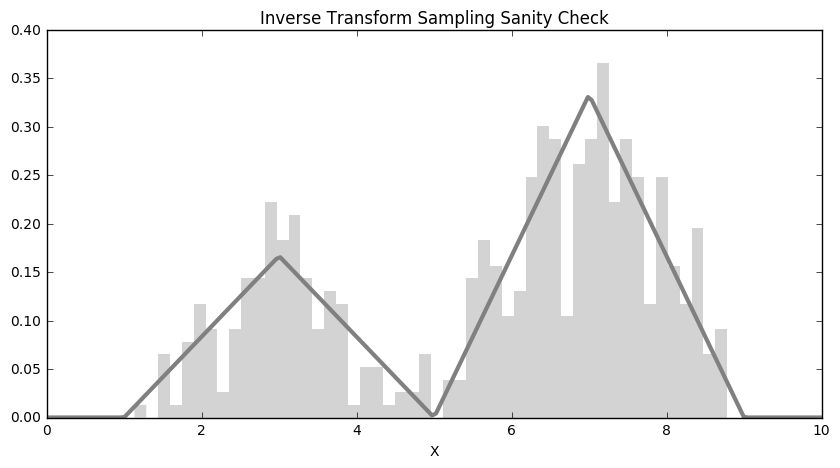

Inverse Transform estimate of E[h(x)]: 0.0587785935546


In [6]:
n_samples = 500 #number of samples to draw

x_samples, mean_inv = inverse_transform(h, F_inv_X, n_samples)

#Sanity check: make sure these x-values look like they 
#are from the correct distribution
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
x = np.linspace(0, 10, 200)
ax.plot(x, map(f_X, x), color='gray', linewidth=3)
ax.hist(x_samples, bins=50, normed=1, color='lightgray', linewidth=0)
ax.set_xlabel('X')
ax.set_title('Inverse Transform Sampling Sanity Check')
plt.show()

print 'Inverse Transform estimate of E[h(x)]: {}'.format(mean_inv)

#### Rejection Sampling

Setting up rejection sampling requires us to find a constant $M$ such that $f_X \leq M g$ where $g$ is the proposal distribution. In general, we want $M$ to be as small as possible. However, in this case we will simply pick a $M$ based on visualizations.

In [7]:
#setting up our proposal distributions

#normal pdf: for sampling and evaluation
def normal_dist(mu, sigma, x=None, n=None):
    if x is not None:
        return norm.pdf(x, mu, sigma)
    elif n is not None:
        return np.random.normal(mu, sigma, n)
    else:
        return None

#uniform pdf: for sampling and evaluation
def uniform_dist(a, b, x=None, n=None):
    if x is not None:
        return np.array([1. / (b - a)] * len(x))
    elif n is not None:
        return np.random.uniform(a, b, n)
    else:
        return None

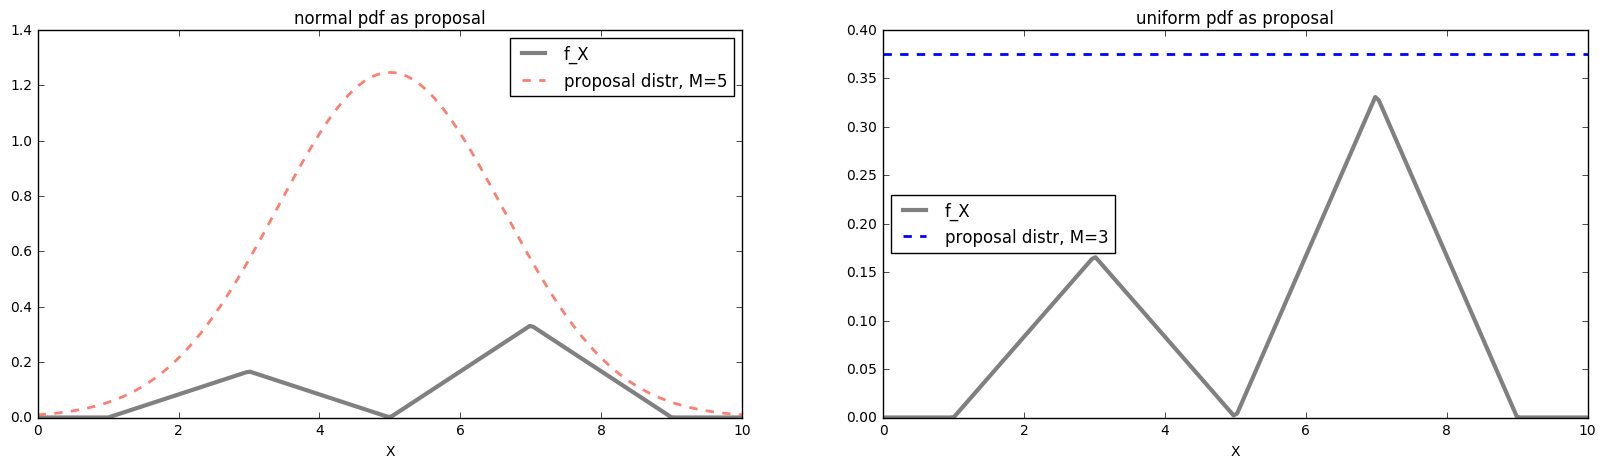

In [8]:
prop_1 = partial(normal_dist, mu=5, sigma=1.6)
M_1 = 5

prop_2 = partial(uniform_dist, a=1, b=9)
M_2 = 3

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 5))
x = np.linspace(0, 10, 200)
ax1.plot(x, map(f_X, x), color='gray', linewidth=3, label='f_X')
ax1.plot(x, M_1 * prop_1(x=x), '--', color='salmon', linewidth=2, label='proposal distr, M={}'.format(M_1))
ax1.set_xlabel('X')
ax1.set_title('normal pdf as proposal')
ax1.legend(loc='best')

ax2.plot(x, map(f_X, x), color='gray', linewidth=3, label='f_X')
ax2.plot(x, M_2 * prop_2(x=x), '--', color='blue', linewidth=2, label='proposal distr, M={}'.format(M_2))
ax2.set_xlabel('X')
ax2.set_title('uniform pdf as proposal')
ax2.legend(loc='best')
plt.show()

Now for the rejection sampling:

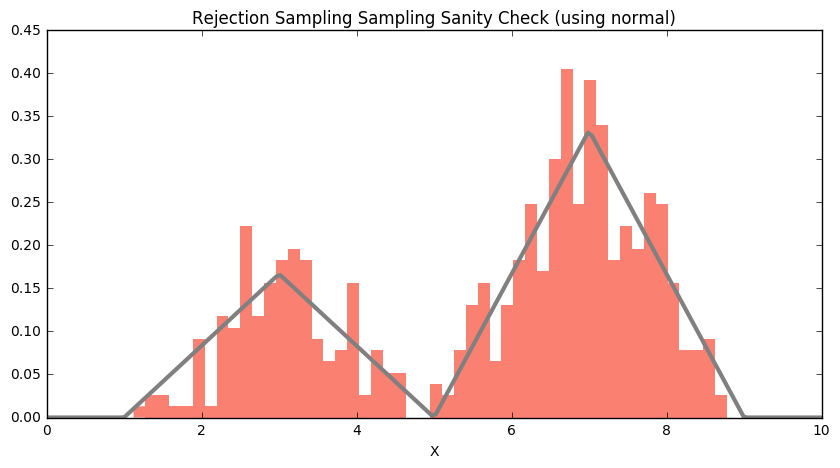

Rejection Sampling estimate of E[h(x)] (using normal): 0.0596486223414


In [9]:
def rejection(n, prop_dist, M, true_dist, h):
    samples = []
    while len(samples) < n:
        sample = prop_dist(n=1)
        if np.random.uniform(0, M * prop_dist(x=sample)) <= true_dist(sample):
            samples.append(sample[0])    
    mean_rej = np.mean(map(h, samples))
    return samples, mean_rej

x_samples, mean_rej = rejection(n_samples, prop_1, M_1, f_X, h)

#Sanity check: make sure these x-values look like they 
#are from the correct distribution
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
x = np.linspace(0, 10, 200)
ax.plot(x, map(f_X, x), color='gray', linewidth=3)
ax.hist(x_samples, bins=50, normed=1, color='salmon', linewidth=0)
ax.set_xlabel('X')
ax.set_title('Rejection Sampling Sampling Sanity Check (using normal)')
plt.show()

print 'Rejection Sampling estimate of E[h(x)] (using normal): {}'.format(mean_rej)

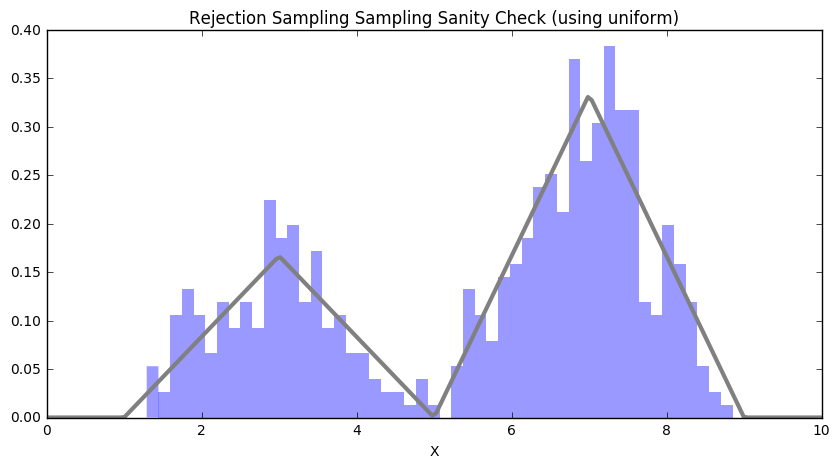

Rejection Sampling estimate of E[h(x)] (using uniform): 0.0588202951919


In [10]:
x_samples, mean_rej = rejection(n_samples, prop_1, M_1, f_X, h)

#Sanity check: make sure these x-values look like they 
#are from the correct distribution
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
x = np.linspace(0, 10, 200)
ax.plot(x, map(f_X, x), color='gray', linewidth=3)
ax.hist(x_samples, bins=50, normed=1, color='blue', linewidth=0, alpha=0.4)
ax.set_xlabel('X')
ax.set_title('Rejection Sampling Sampling Sanity Check (using uniform)')
plt.show()

print 'Rejection Sampling estimate of E[h(x)] (using uniform): {}'.format(mean_rej)

### Importance Sampling

In [11]:
def importance(n, prop_dist, f_X, h):
    samples = prop_dist(n=n)
    weights = np.multiply(map(f_X, samples), prop_dist(x=samples)**-1.)
    mean_imp = np.multiply(map(h, samples), weights).sum() / weights.sum()
    return mean_imp

mean_imp = importance(n_samples, prop_1, f_X, h)
print 'Importance Sampling estimate of E[h(x)] (using normal): {}'.format(mean_imp)

mean_imp = importance(n_samples, prop_2, f_X, h)
print 'Importance Sampling estimate of E[h(x)] (using uniform): {}'.format(mean_imp)

Importance Sampling estimate of E[h(x)] (using normal): 0.0576586344367
Importance Sampling estimate of E[h(x)] (using uniform): 0.0586980791209


## Problem 2: Variance Reduction

### Part A

Compute the variance of each estimate of $\mathbb{E}[h(X)]$ obtained in Problem 1. Based on the discussion on sampling methods in lecture, which sampling methods, proposal distributions is expected, in principle, to resulted in lower variances? How well do your results align with these expectations?

**Solutions:**

***Disclaimer*** In the solutions, we've implemented these sampling methods to increase readability (for example, the functions are defined exactly as they are written mathematically). However, this makes them slow to evaluate. We ***highly*** encourage you to explore ways fo increasing the efficiency of these implementations.

In [12]:
n_simulations = 500

var_inv = np.std([inverse_transform(h, F_inv_X, n_samples)[1] for i in range(n_simulations)])
var_imp_1 = np.std([importance(n_samples, prop_1, f_X, h) for i in range(n_simulations)])
var_imp_2 = np.std([importance(n_samples, prop_2, f_X, h) for i in range(n_simulations)])
var_rej_1 = np.std([rejection(n_samples, prop_1, M_1, f_X, h)[1] for i in range(n_simulations)])
var_rej_2 = np.std([rejection(n_samples, prop_2, M_2, f_X, h)[1] for i in range(n_simulations)])

print 'variance of inverse transform: {}'.format(var_inv)
print 'variance of importance with normal: {}'.format(var_imp_1)
print 'variance of importance with uniform: {}'.format(var_imp_2)
print 'variance of rejection with normal: {}'.format(var_rej_1)
print 'variance of rejection with uniform: {}'.format(var_rej_2)

variance of inverse transform: 0.000457280205278
variance of importance with normal: 0.000653190830413
variance of importance with uniform: 0.00044132670369
variance of rejection with normal: 0.000454363358869
variance of rejection with uniform: 0.000445558307882


As we've discussed in the review, we'd expect importance sampling to *reduce* variance of our estimate of $\mathbb{E}[h(X)]$. So why is it that we see in the above that importance sampling is producing the *highest* variance when we use a normal proposal distribution? 

Recall that variance reduction can achieved using  importance sampling given that we choose a proposal distribution that is, as much as possible, proportional to $f_X \cdot h$. If we choose our proposal distributions poorly, importance sampling can lead to a variance increase! For our proposal distributions, we'd chosen a uniform distribution and a normal distribution with mean 5 and variance 1.6. It is very possible that these distribution are inappropriate for our distribution $f_X$ and function $h$.

Let's plot $f_X \cdot h$ and see how well the normal distribution captures the trends in this product.

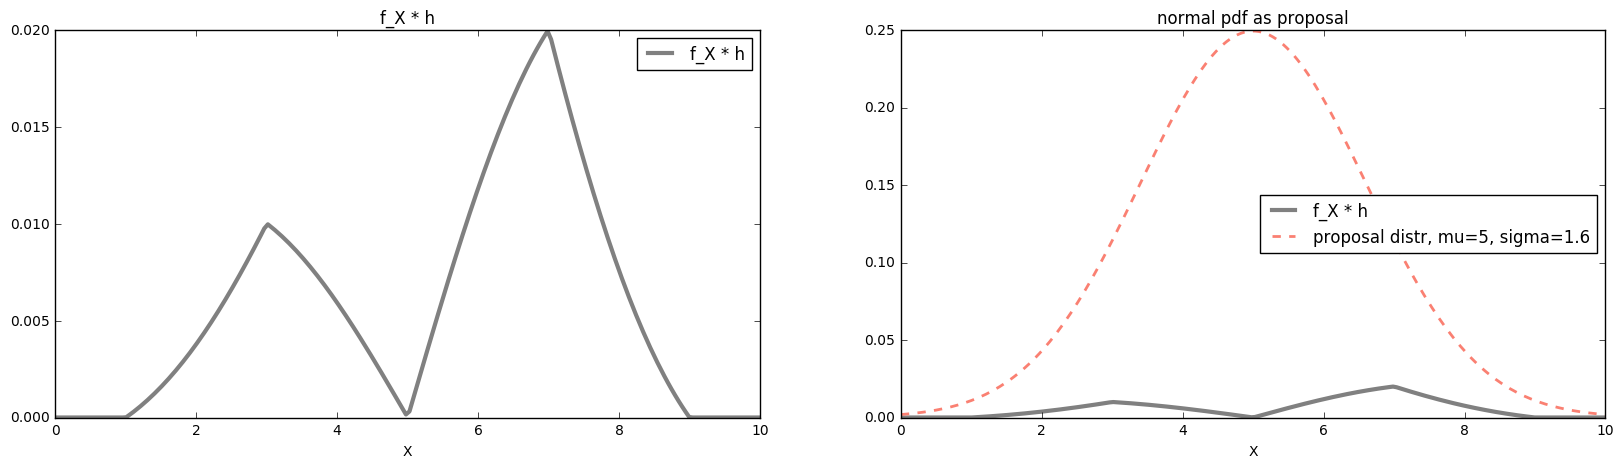

In [13]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 5))
x = np.linspace(0, 10, 200)
ax1.plot(x, map(lambda x: f_X(x) * h(x), x), color='gray', linewidth=3, label='f_X * h')
ax1.set_xlabel('X')
ax1.set_title('f_X * h')
ax1.legend(loc='best')

ax2.plot(x, map(lambda x: f_X(x) * h(x), x), color='gray', linewidth=3, label='f_X * h')
ax2.plot(x, prop_1(x=x), '--', color='salmon', linewidth=2, label='proposal distr, mu={}, sigma={}'.format(5, 1.6))
ax2.set_xlabel('X')
ax2.set_title('normal pdf as proposal')
ax2.legend(loc='best')
plt.show()

We see that the problem that our pdf $f_X$ is bimodal (has two peaks), while a normal pdf has only one. If we restrict ourselves to using either uniform or normal proposal distributions, it is not possible to satisfy $g \propto f_X \cdot h$. 

Here, we encourage you to try out some other types of proposal distributions for importance sampling - experiment to see if you can obtain a variance reduction.

### Part B (Stratified Sampling)

Often, a complex integral can be computed with more ease if one can break up the domain of the integral into pieces and if on each piece of the domain the integral is simplified. 

- Find a natural way to divide the domain of $X$ and express $\mathbb{E}[h(X)]$ as an ***correctly*** weighted sum of integrals over the pieces of the domain of $X$. (This constitutes the essentials of Stratified Sampling)

- Estimate each integral in the summand using rejection sampling using a normal proposal distribution (with sensibly chosen parameters). From these, estimate $\mathbb{E}[h(X)]$.

- Compute the variance of your estimate of $\mathbb{E}[h(X)]$. Compare with the variance of your previous estimate of $\mathbb{E}[h(X)]$ (in Part A, using rejection sampling, a normal proposal distribution over the entire domain of $X$).

**Solutions:**

Since the graph of $f_X$ is a set of two triangular peaks, it's natural for us to try and divide the domain of $f_X$ into two pieces $(-\infty, 5]$ and $[5, \infty)$. 

Note that $\mathrm{P}(x\in (-\infty, 5]) = \frac{1}{3}$ and that $\mathrm{P}(x\in [5, \infty]) = \frac{2}{3}$.

Thus, we can write:
$$
\mathbb{E}[h(X)] = \frac{1}{3} \int_1^5 h(x) f_X(x) dx + \frac{2}{3} \int_5^9 h(x) f_X(x) dx.
$$

We will approximate each integral $\int_1^5 h(x) f_X(x) dx$, $\int_5^9 h(x) f_X(x) dx$ separately using rejection sampling and a normal distribution. From each strata, we will draw equal number of points (note that we can also draw different number of points in approximating each integral).

In [14]:
def f_X_1(x):
    if x >= 1 and x <= 3:
        return 1./12 * (x - 1.)
    elif x > 3 and x <= 5:
        return -1./12 * (x - 5)
    else:
        return 0.
    
def f_X_2(x):
    if x > 5 and x <= 7:
        return 1./6 * (x - 5)
    elif x > 7 and x <= 9:
        return -1./6 * (x - 9)
    else:
        return 0.
    
prop_strat_1 = partial(normal_dist, mu=3, sigma=1)
prop_strat_2 = partial(normal_dist, mu=7, sigma=1)
M_S1 = 0.5
M_S2 = 1

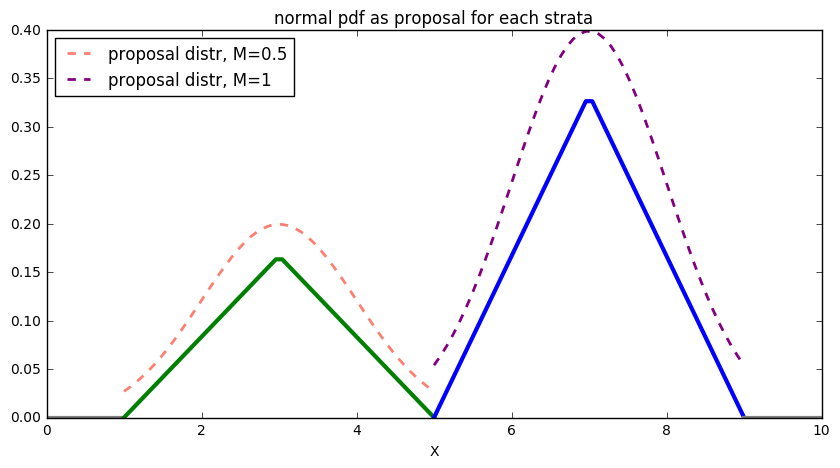

In [15]:
#stratified
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
x1 = np.linspace(0, 1, 50)
x2 = np.linspace(1, 5, 50)
x3 = np.linspace(5, 9, 50)
x4 = np.linspace(9, 10, 50)
ax.plot(x1, map(f_X, x1), color='gray', linewidth=3)
ax.plot(x2, map(f_X, x2), color='green', linewidth=3)
ax.plot(x3, map(f_X, x3), color='blue', linewidth=3)
ax.plot(x4, map(f_X, x4), color='gray', linewidth=3)
ax.plot(x2, M_S1 * prop_strat_1(x=x2), '--', color='salmon', linewidth=2, label='proposal distr, M={}'.format(M_S1))
ax.plot(x3, M_S2 * prop_strat_2(x=x3), '--', color='purple', linewidth=2, label='proposal distr, M={}'.format(M_S2))

ax.set_xlabel('X')
ax.set_title('normal pdf as proposal for each strata')
ax.legend(loc='best')
plt.show()

In [16]:
proportion = 1./2
n_samples_1 = int(proportion * 500)
n_samples_2 = 500 - n_samples_1

means = []
for i in range(n_simulations):
    means.append(1./3 * rejection(n_samples_1, prop_strat_1, M_S1, f_X_1, h)[1] + 2./3 * rejection(n_samples_2, prop_strat_2, M_S2, f_X_2, h)[1])
    
print 'stratified mean: {}'.format(np.mean(means))
print 'stratified std: {}'.format(np.std(means))

stratified mean: 0.0588804662028
stratified std: 0.000514172132761


Alas, we do not see a significant reduction in variance using these particular two stata and the scheme of sampling equal number of points from each. From our discussion in the review, we see that the variance of the stratified sampling estimate depends on the variance of the estimates of each subintegral as well as on the number of points we sample in calculating each of these subintegrals. 

We encourage you to try out the following modifications to our naive implementaiton of stratified sampling to see if you can obtain a variance reduction:

1. subdivide the domain of $f_X$ to minimize $\mathrm{Var}[h(X|X\in D_j)]$, where $D_j$ is a strata (or a piece in your subdivision).
2. rather than sampling an equal number of points from each strata, sample more points from strata that are have greater probability mass and or on which $h(X|X\in D_j)$ has greater variance. 


#### What is the point?
Most variance reduction methods, and indeed most models and algorithms in this class, do not work well in "factory settings" or arbitrary settings. Models or algorithms with theoretical performance gaurantees also come with parameters that must be tuned to satisfy specific conditions.